In [ ]:
%reset

In [1]:
import numpy as np
import sklearn
import gzip
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})
# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size':'x-large'}

plt.rcParams.update(params)

ValueError: Key font.size: Could not convert 'x-large' to float

# Reading Data

In [130]:
classes = np.array(['0','1', '2', '3', '4', '5','6','7','8','9'])
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=[20,12])
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #plt.xlim(-0.5, len(np.unique(y))-0.5)
    #plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax


In [131]:
# Training data

import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')
image_size = 28
n_images_train = 50000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * n_images_train)
data_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_train = data_train.reshape(n_images_train, image_size, image_size)
data_train=data_train/255

f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
labels_train=np.zeros(n_images_train)
for i in range(0,n_images_train):   
    buf = f.read(1)
    labels_train[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_train=labels_train.astype(int)    

In [132]:
# Test data
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
image_size = 28
n_images_test = 10000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * n_images_test)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(n_images_test, image_size, image_size)
data_test = data_test/255
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
labels_test=np.zeros(n_images_test)
for i in range(0,n_images_test):   
    buf = f.read(1)
    labels_test[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_test=labels_test.astype(int)    

In [134]:
np.shape(data_train)

(50000, 28, 28)

## Plot

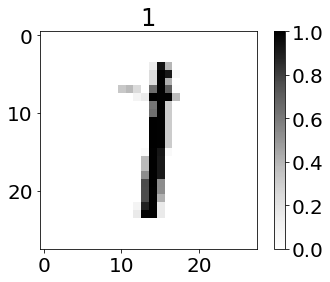

In [135]:
ind=np.random.randint(0,n_images_train)

plt.imshow(data_train[ind],cmap=plt.get_cmap('Greys'));
plt.title(labels_train[ind]); 
plt.colorbar();

In [136]:
X_train=data_train.squeeze().reshape(n_images_train,28*28)
y_train=labels_train
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


In [137]:
X_test=data_test.squeeze().reshape(n_images_test,28*28)
y_test=labels_test
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


# Logistic Regression

In [59]:
from sklearn import linear_model
model=linear_model.LogisticRegression(max_iter=5000)
logreg=model.fit(X_train,y_train)

In [138]:
y_hat=logreg.predict(X_test)
score=sklearn.metrics.accuracy_score(y_hat,y_test)
print((1-score)*100)

7.469999999999999


Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

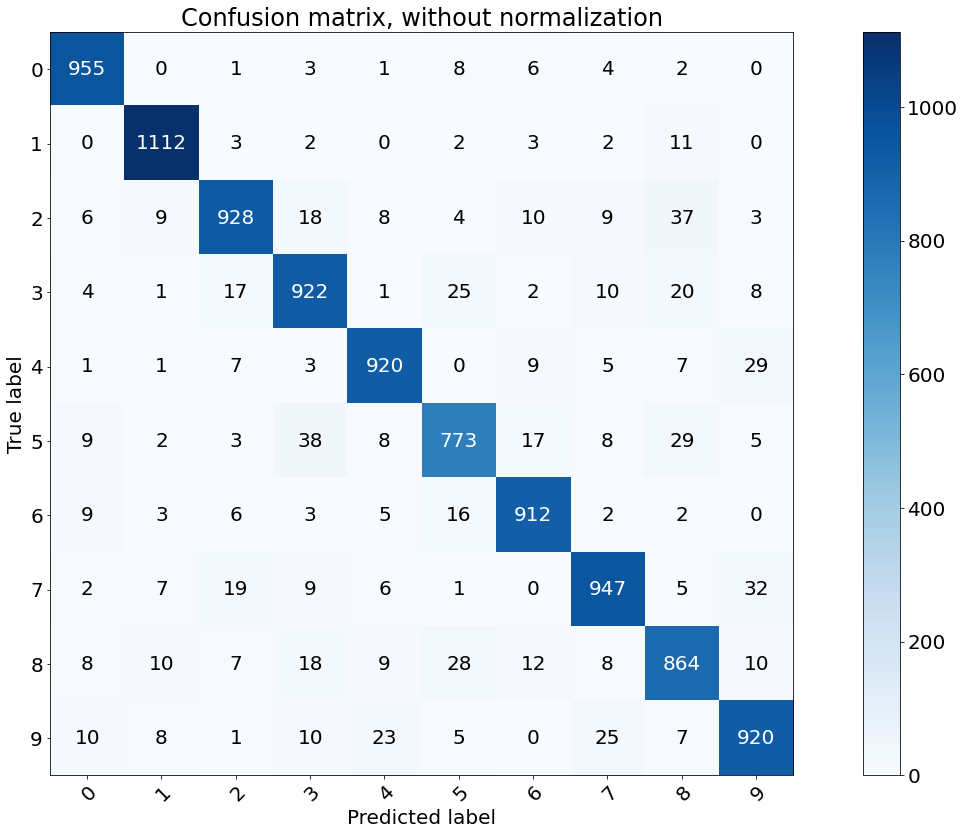

In [140]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_hat)
plot_confusion_matrix(y_test, y_hat, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)


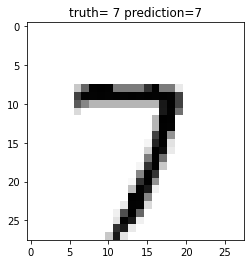

In [22]:
ind=np.random.randint(0,n_images_test)

plt.imshow(data_test[ind],cmap=plt.get_cmap('Greys'));
plt.title('truth= '+str(y_test[ind])+' prediction='+str(y_hat[ind])); 

# Neural Net

In [105]:
from sklearn import neural_network
model=neural_network.MLPClassifier(hidden_layer_sizes=[256,128],max_iter=1000,alpha=0.001)
mnist=model.fit(X_train,y_train)

In [141]:
y_hat=mnist.predict(X_test)
score=sklearn.metrics.accuracy_score(mnist.predict(X_test),y_test)
print((1-score)*100)

2.849999999999997


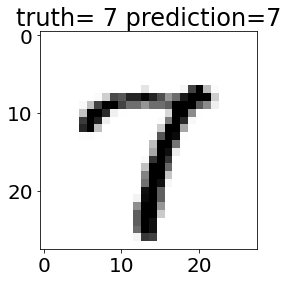

In [157]:
ind=np.random.randint(0,n_images_test)

plt.imshow(data_test[ind],cmap=plt.get_cmap('Greys'));
plt.title('truth= '+str(y_test[ind])+' prediction='+str(y_hat[ind])); 

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

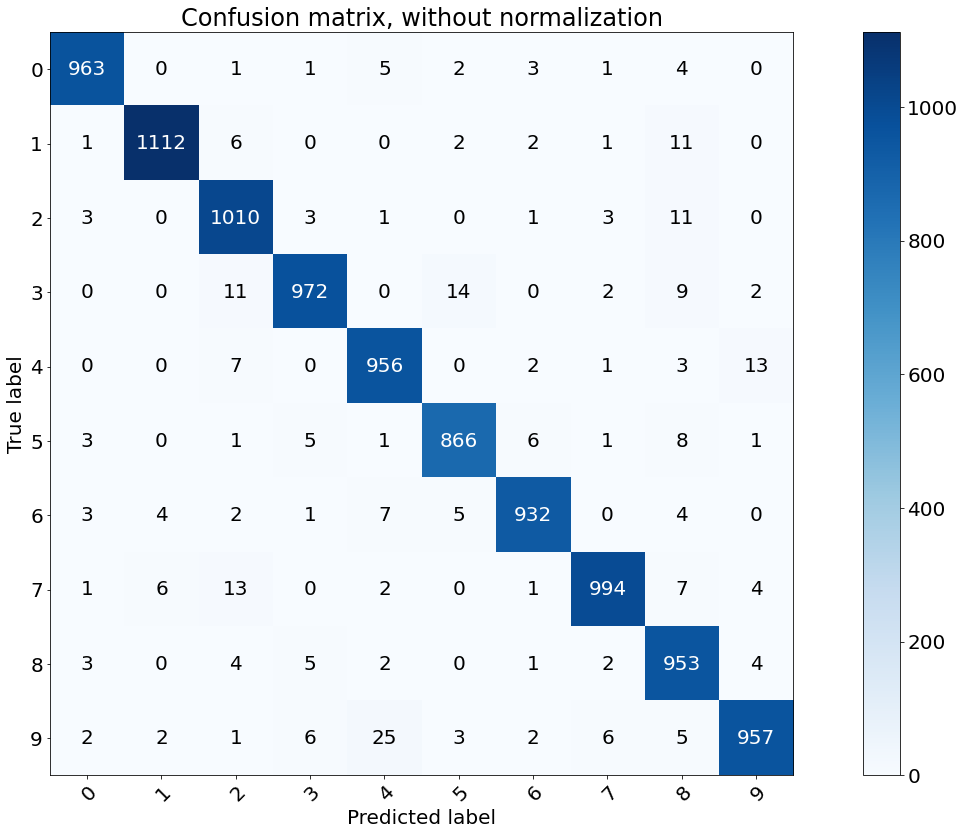

In [158]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_hat)
plot_confusion_matrix(y_test, y_hat, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)